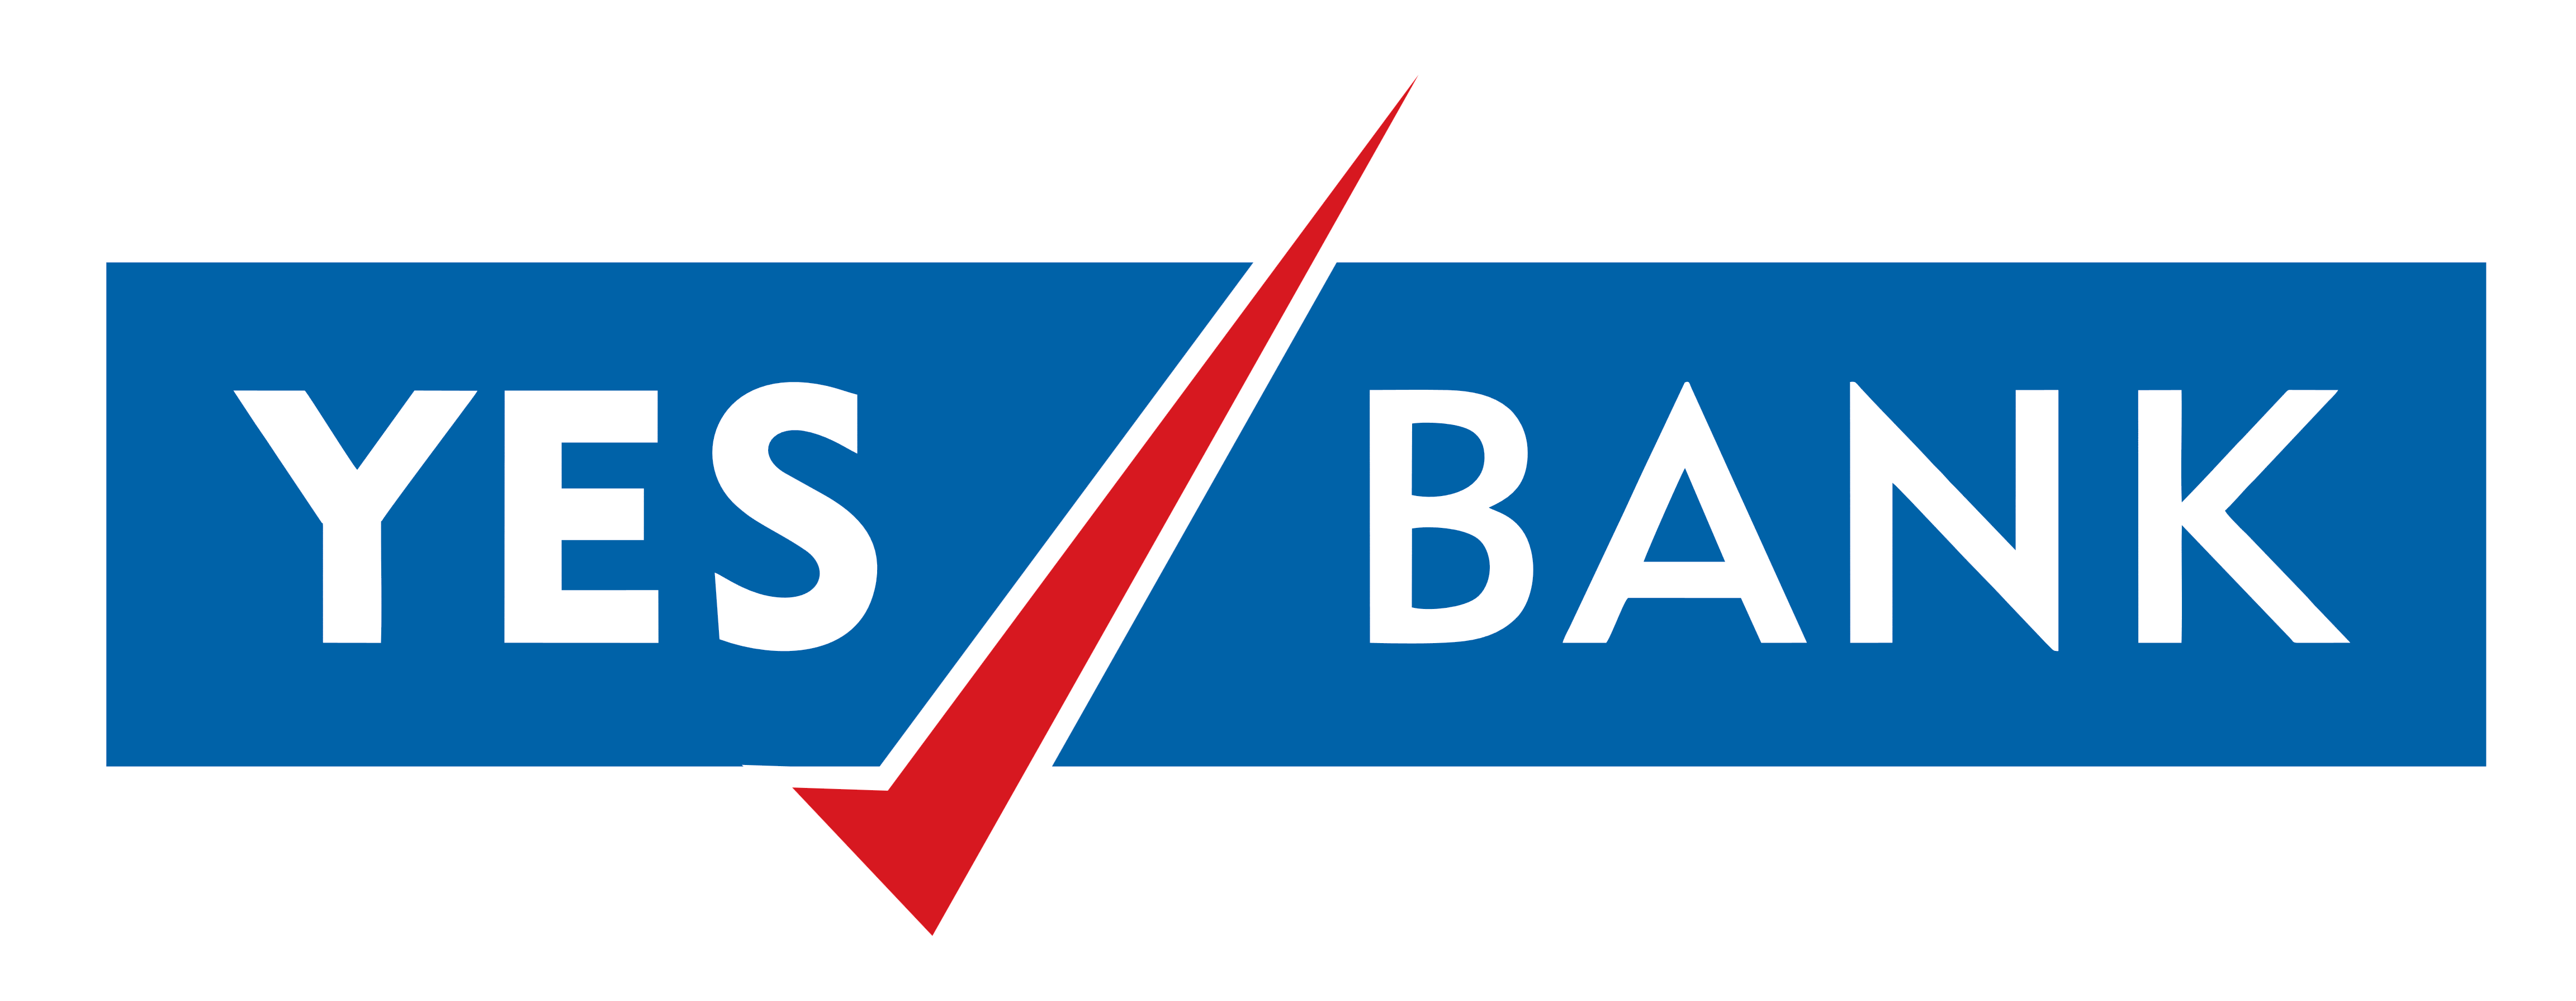




Project Type - Regression  
Contribution - Team

## ***1. Know Your Data***

### Import Libraries

# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import DecisionTreeRegressor,AdaBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path= "/content/drive/My Drive/data_YesBank_StockPrices.csv"
df=pd.read_csv(path)
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset First View

##**Dataset Rows & Columns count**

In [4]:
#Checking for rows and columns
df.shape

(185, 5)

In [5]:
#Checking for columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [6]:
# Overview by using head
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
# Overview by using tail
df.tail

<bound method NDFrame.tail of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

### Dataset Information

In [8]:
#Checking for the information of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB



- There are five features in the dataset having Date,Open,High,Low,Close the
  feature open and close represents the starting and closing file of the the stock
- The High, Low features represent the maximum and minimum price of the stock.






In [9]:
#Description of the data in the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


#### Duplicate Values

In [10]:
#Checking for the duplicated
np.where(df.duplicated()==True)

(array([], dtype=int64),)

- There is no duplicate value in the datstet

#### Missing Values/Null Values

In [11]:
# Checking for the missing values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

- There is no missing value in the dataset

### What did you know about your datitalicized textaset?

### **Since, we've seen the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:**

>**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

>**High** - The high is the highest price at which a stock traded during a period.

>**Low** -The low is the highest price at which a stock traded during a period.

>**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

## ***2. Understanding Your Variables***


In [12]:
# Understanding about the variable
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


# **Data Wrangling**


> Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


## Objectives:
*   Handle missing values
*   Correct data format
*   Standardize and normalize data


## Missing value and duplicate

Since we alredy checked thet there is no missining and duplictes valeu in the dataset,Hence we will further checke the type of the dataset

#Corerct the data format

In [14]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

<h3>The Given Date in data is format of Month-YY. We need to convert in proper date format of YYYY-MM-DD.</h3>

Since, Date column has dtype as object we've to convert it into datetime format

In [15]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date

from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

- After changing the data type of required column all the columns are in the corect datatype

<h2><b>Checking the Outlier</b></h2>

<Axes: >

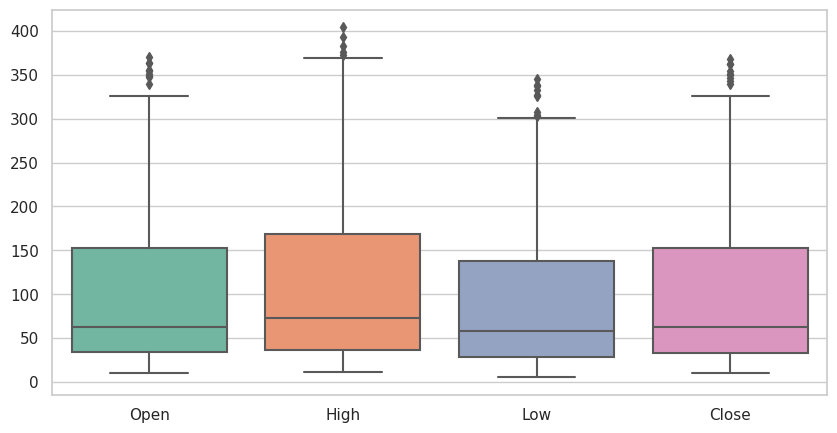

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))

sns.boxplot(data=df,palette="Set2")

By the visulization we can see that there are outlieres present in the data.We will handle this by usning best approach

<h3>Visualising the data</h3>

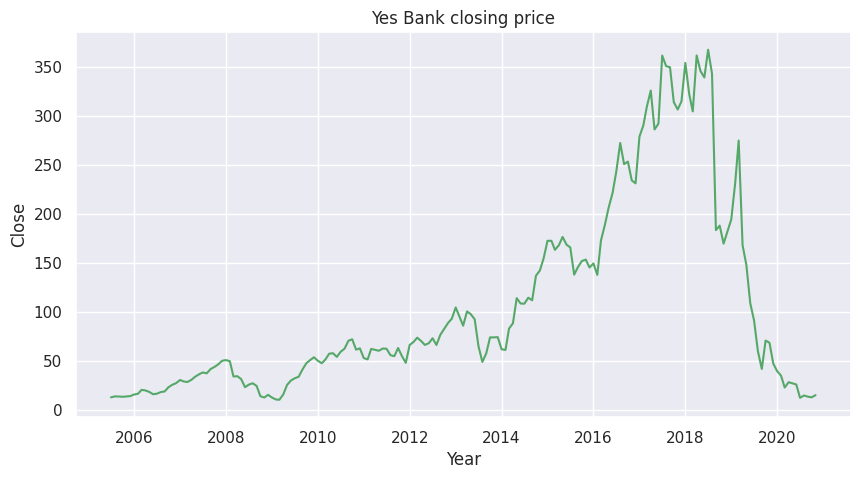

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))

sns.lineplot(x="Date", y="Close",data=df,color='g')
plt.xlabel('Year')
plt.title('Yes Bank closing price')
plt.show()



Now, We can easly see in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor.


* **Plotting distribution** of Open , High and Low numerical Features





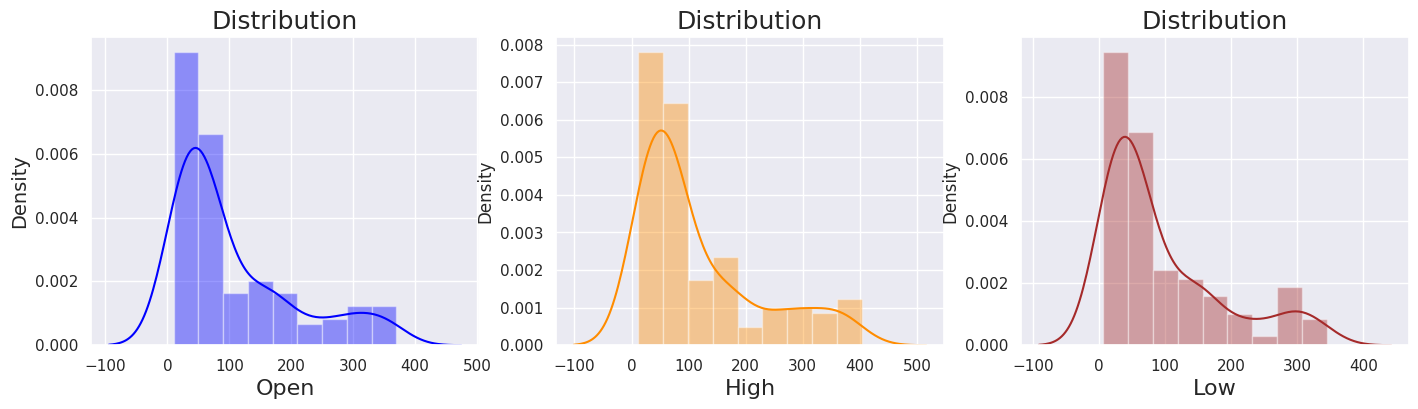

In [18]:

plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(df['Open'], color = 'Blue')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(df['High'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(df['Low'], color = 'Brown')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()


* It's looking like **rightly skewed** for all features.

<h4>Again applying <b>log transformation</b> to make it <b>normal distribution.</b>

> The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.






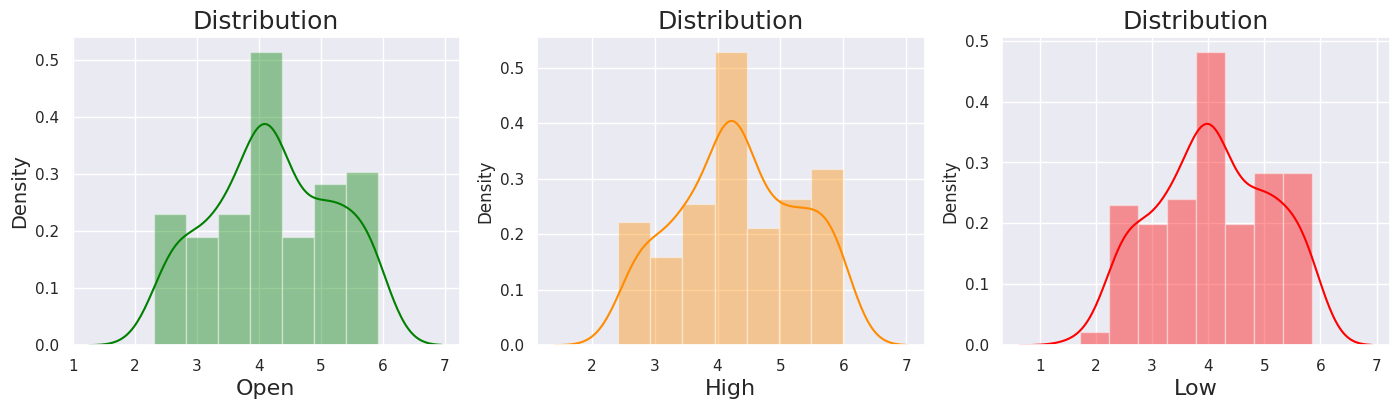

In [19]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(np.log(df['Open']), color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(np.log(df['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(np.log(df['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

* Now, It looks like **Normally Distributed** of ***Open, High*** and ***Low***


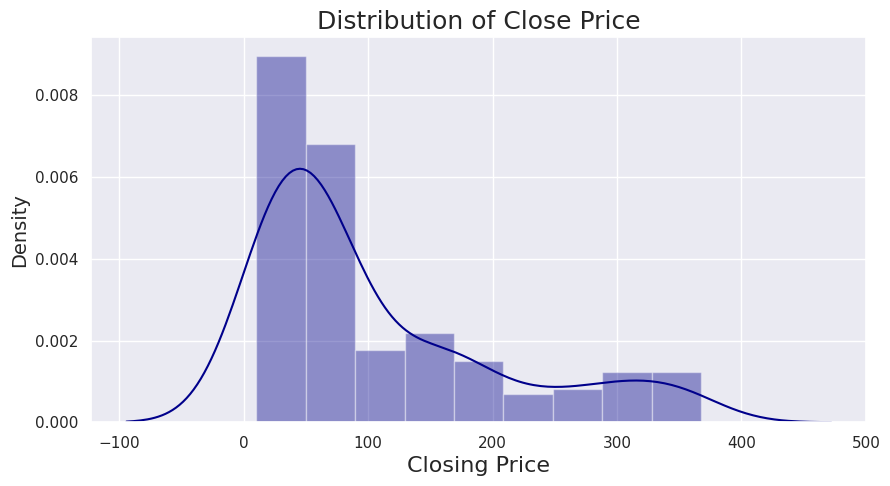

In [20]:
# depndent variable is 'Close'
# Normal Distribution
plt.figure(figsize = (10,5))
sns.distplot(df['Close'], color = 'darkblue',kde=True)
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()



<h4>Applying <b>log transformation</b> to make it <b>normal distribution.</b>

> The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.





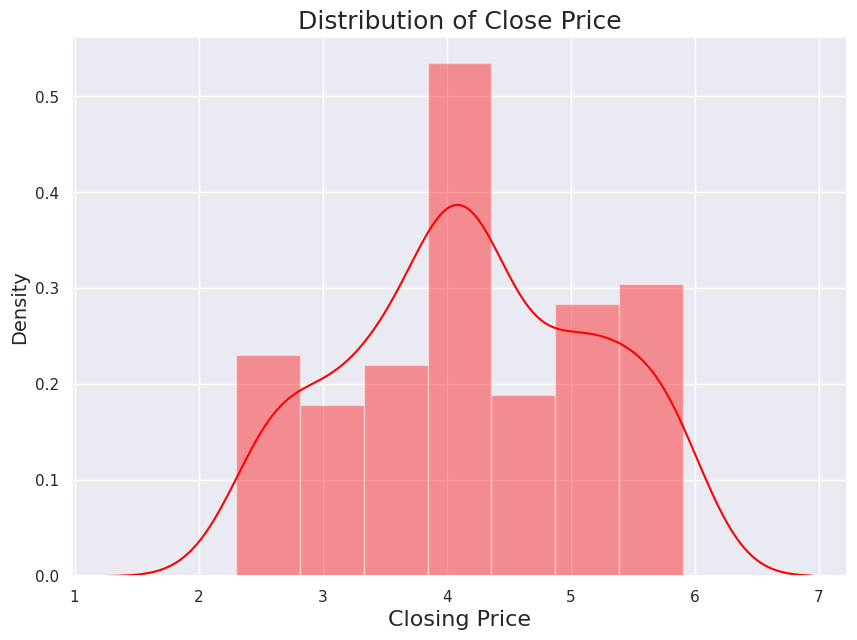

In [21]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (10,7))
sns.distplot(np.log(df['Close']), color = 'red')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

*  Now, distribution of closing price is more normal, after applying log transformation

<h3><b>Now find out the realation between the Dependent Variable and independent Variable</b></h3>


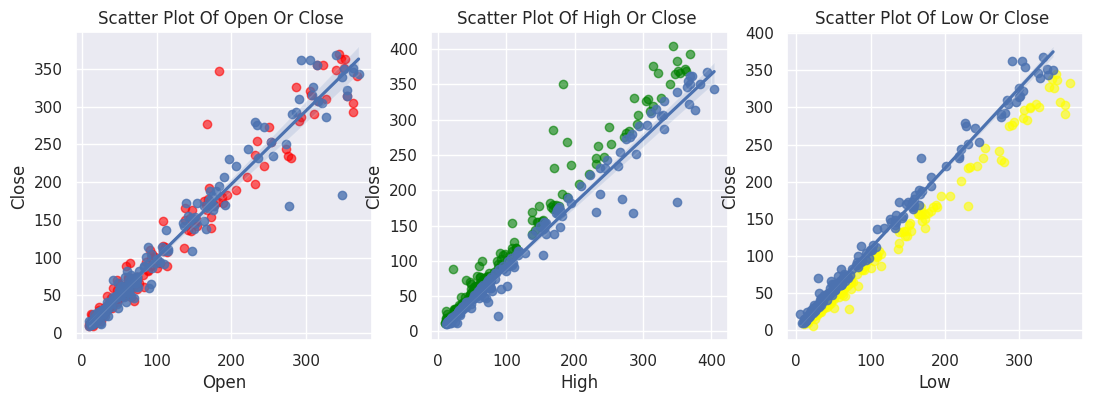

In [22]:
plt.figure(figsize = (13,4))

plt.subplot(1, 3, 1)
plt.scatter(df['Close'], df['Open'], alpha=0.6,color="red")
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df)

plt.subplot(1, 3, 2)
plt.scatter(df['Close'], df['High'],color="green", alpha=0.6)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df)

plt.subplot(1, 3, 3)
plt.scatter(df['Close'], df['Low'],color="yellow", alpha=0.6)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df)

plt.show()

<h1><b> Correlation

* <h3>Now, we will see the correlation between all the features in our data set

In [23]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


<Axes: >

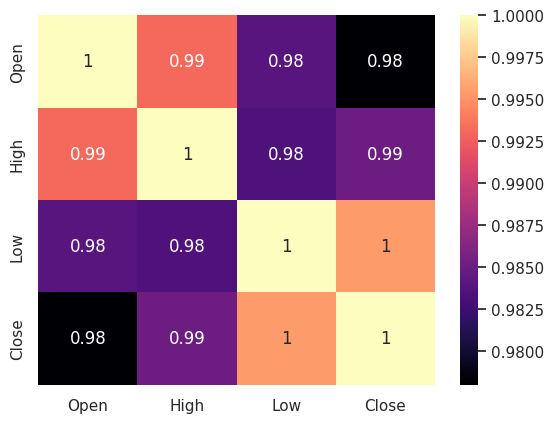

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='magma')

We can clearly see, All variables having strong correlation among them

<h1>Variance Inflation Factor (VIF) values of Independent Variables.

>**Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.



In [25]:
vif_list=[]
a=df.drop(['Date','Close'],axis=1)


for i in range(a.shape[1]):
  vif=variance_inflation_factor(a.to_numpy(),i)
  vif_list.append(vif)
vif_series=pd.DataFrame(vif_list,index=a.columns)
vif_series

,0
Open,175.185704
High,167.057523
Low,71.574137


<Axes: >

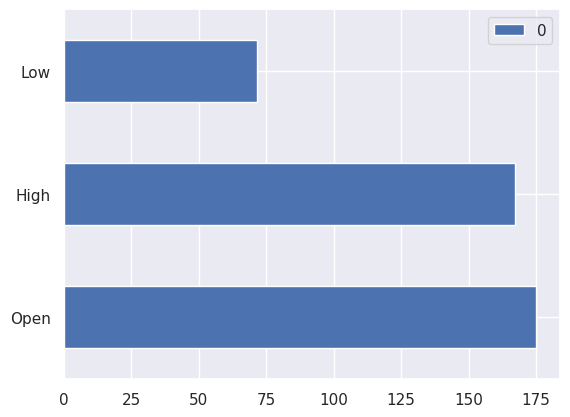

In [26]:
vif_series.plot(kind="barh")

---
<center><h1><b>Model Development</b></h1></center>

---

* A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

---
# **Train Test Split**
---

Splitting Data

X = Independent Variable

y = Dependent Variable

---
#<b>📍Implementing Linear Regression</b>
---
>Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

* You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.
* The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.
---

In [27]:
x=df.drop(['Date','Close'],axis=1)
x=np.log(x)
y=df['Close']
x

,Open,High,Low
0,2.564949,2.639057,2.420368
1,2.532108,2.700018,2.529721
2,2.601207,2.699346,2.507157
3,2.580217,2.672078,2.517696
4,2.591516,2.630449,2.555676
...,...,...,...
180,3.242592,3.342862,2.406945
181,2.484907,2.842581,2.472328
182,2.660260,2.730464,2.545531
183,2.587764,2.639771,2.494032


In [28]:
model_details = ['LinearRegression','Ridge','Lasso','Ridgr_hyper','Lasso_hyper','DecisionTree','DecisionTree_Hyper_pre','DecisionTree_Hyper_post',
                 'RandomForest','KNN',"KNN_Normalization",'KNN_standerdization']
testing_accuract_list = []
training_accuracy_list = []

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(138, 3)
(47, 3)
(138,)
(47,)


In [31]:
model_lin_regression=LinearRegression()
model_lin_regression.fit(x_train,y_train)

LinearRegression()

In [32]:
round(model_lin_regression.score(x_train,y_train),2)

0.84

In [33]:
round(model_lin_regression.score(x_test,y_test),2)

0.71

In [34]:
#Training
y_train_pred=model_lin_regression.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)
training_accuracy_list.append(r2)

mean_squared_error: 1615.8309638162693
************************************************************
rmse: 40.197399963384065
************************************************************
mean_absolute_error: 33.722225746838255
************************************************************
r2_score: 0.8132687628951601


In [35]:
#Testing
y_test_pred=model_lin_regression.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)



mean_squared_error: 2043.0568623633703
************************************************************
rmse: 45.20018653018337
************************************************************
mean_absolute_error: 40.668222977235565
************************************************************
r2_score: 0.7804175656322877


Text(0, 0.5, 'Predicted test value')

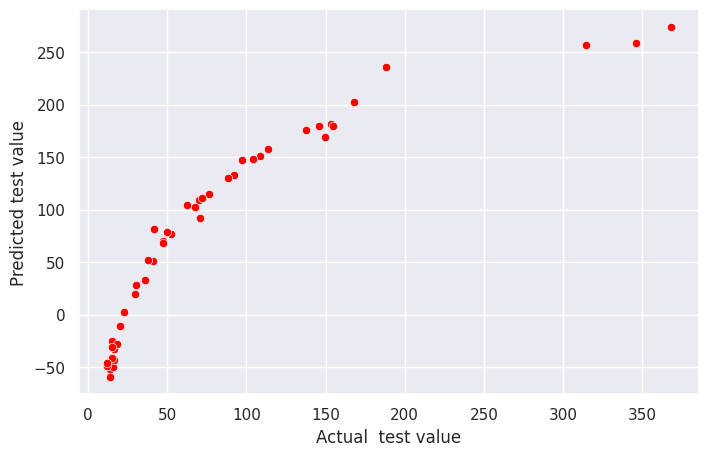

In [36]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=y_test,y=y_test_pred,color='red')
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

In [37]:
ridg_reg=Ridge(alpha=0.001)
ridg_reg.fit(x_train,y_train)

Ridge(alpha=0.001)

In [38]:
#Training
y_train_pred=ridg_reg.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



mean_squared_error: 1615.831232845248
************************************************************
rmse: 40.19740330973194
************************************************************
mean_absolute_error: 33.72345783229927
************************************************************
r2_score: 0.8132604840559561


In [39]:
#Testing
y_test_pred=ridg_reg.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


mean_squared_error: 2042.7810430037719
************************************************************
rmse: 45.1971353406803
************************************************************
mean_absolute_error: 40.66646971092551
************************************************************
r2_score: 0.7804407061652039


In [40]:
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

In [41]:
#Training
y_train_pred=lasso_reg.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



mean_squared_error: 1615.8315425226908
************************************************************
rmse: 40.19740716169005
************************************************************
mean_absolute_error: 33.723937204988864
************************************************************
r2_score: 0.8132565743234766


In [42]:
#Testing
y_test_pred=lasso_reg.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)



mean_squared_error: 2042.6472172990254
************************************************************
rmse: 45.195654849764324
************************************************************
mean_absolute_error: 40.665688616816766
************************************************************
r2_score: 0.7804522526596318


##**Hyperparameter Tunning**

In [43]:
ridg_reg=Ridge()
parameter_grid=({"alpha":np.arange(0.01,3,0.01)})
gscv_ridge=GridSearchCV(ridg_reg,parameter_grid,cv=5)
gscv_ridge.fit(x_train,y_train)
gscv_ridge.best_estimator_

Ridge(alpha=2.9899999999999998)

In [44]:
lasso_reg=Lasso()
parameter_grid=({"alpha":np.arange(0.01,3,0.01)})
gscv_lasso=GridSearchCV(lasso_reg,parameter_grid,cv=5)
gscv_lasso.fit(x_train,y_train)
gscv_lasso.best_estimator_

Lasso(alpha=2.9899999999999998)

In [45]:
parameter_grid

{'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
        1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
        1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
        1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
        1.44, 1.45, 1.46, 1.4

In [46]:
#Training After Hyperparameter Tunning ridge
y_train_pred=gscv_ridge.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



mean_squared_error: 1688.5739051034222
************************************************************
rmse: 41.09226089062784
************************************************************
mean_absolute_error: 34.53726908748815
************************************************************
r2_score: 0.7992554371198364


In [47]:
#Testing  After Hyperparameter Tunning ridge

y_test_pred=gscv_ridge.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


mean_squared_error: 1991.829273327426
************************************************************
rmse: 44.6299145565777
************************************************************
mean_absolute_error: 39.64828490074457
************************************************************
r2_score: 0.7826633017007592


In [48]:
#Training After Hyperparameter Tunning Lasso

y_train_pred=gscv_lasso.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)


mean_squared_error: 1685.1329648117628
************************************************************
rmse: 41.050371067893686
************************************************************
mean_absolute_error: 34.35392635879583
************************************************************
r2_score: 0.7899603087195557


In [49]:
#Testing  After Hyperparameter Tunning Lassso

y_test_pred=gscv_lasso.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


mean_squared_error: 1888.1016228356614
************************************************************
rmse: 43.452291341604315
************************************************************
mean_absolute_error: 38.57211435261053
************************************************************
r2_score: 0.783433572746701


In [50]:
dt_reg=DecisionTreeRegressor(random_state=11)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=11)

In [51]:
#Training Decision tree regression
y_train_pred=dt_reg.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



mean_squared_error: 0.0
************************************************************
rmse: 0.0
************************************************************
mean_absolute_error: 0.0
************************************************************
r2_score: 1.0


In [52]:
#Testing Decision tree regression

y_test_pred=dt_reg.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)



mean_squared_error: 98.19889787234034
************************************************************
rmse: 9.90953570417607
************************************************************
mean_absolute_error: 6.074468085106382
************************************************************
r2_score: 0.9863684171307262


#**Hyperparameter Tunning DT**

In [53]:
dt_reg=DecisionTreeRegressor(random_state=12)

parameter_grid=({'criterion':["squared_error",'absolute_error'],
                'max_depth':np.arange(3,8),
               'min_samples_split':np.arange(3,15),
                'max_leaf_nodes':np.arange(3,20)})
gsec_dt_reg=GridSearchCV(dt_reg,parameter_grid,cv=5)
gsec_dt_reg.fit(x_train,y_train)
gsec_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      max_leaf_nodes=18, min_samples_split=3, random_state=12)

In [54]:
#Training After Hyperparameter Decision tree regression
y_train_pred=gsec_dt_reg.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



mean_squared_error: 43.35902789855073
************************************************************
rmse: 6.5847572391509415
************************************************************
mean_absolute_error: 4.160507246376811
************************************************************
r2_score: 0.9958810891093084


In [55]:
#Testing After Hyperparametr Decision tree regression

y_test_pred=gsec_dt_reg.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


mean_squared_error: 106.94329148936161
************************************************************
rmse: 10.3413389601812
************************************************************
mean_absolute_error: 6.810638297872337
************************************************************
r2_score: 0.9857771253606844


In [56]:
result=dt_reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list=result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 1.44927536e-06, 5.79710145e-06, 9.05797081e-06,
       1.30434780e-05, 1.30434783e-05, 1.77536232e-05, 2.93478262e-05,
       4.38405797e-05, 8.16425121e-05, 9.27536232e-05, 1.04710145e-04,
       1.30797101e-04, 1.44927536e-04, 2.03019324e-04, 2.84057971e-04,
       2.84057971e-04, 3.26086957e-04, 3.48188406e-04, 3.71014493e-04,
       4.78321256e-04, 5.23188406e-04, 5.79710145e-04, 6.39130435e-04,
       7.16062802e-04, 8.52173913e-04, 8.69927536e-04, 1.30887681e-03,
       2.14818841e-03, 2.14818841e-03, 3.06666667e-03, 3.74106280e-03,
       3.99456522e-03, 4.14818841e-03, 4.22608696e-03, 4.54492754e-03,
       4.79166667e-03, 4.87536232e-03, 5.76576087e-03, 6.33345411e-03,
       8.03913043e-03, 8.95078502e-03, 9.98405797e-03, 1.03945894e-02,
       1.04710145e-02, 1.05816425e-02, 1.13827295e-02, 1.16812802e-02,
       1.18699275e-02, 1.30797101e-02, 1.62840580e-02, 1.80081522e-02,
       1.92586957e-02, 2.13945652e-02, 2.15710145e-02, 2.24641304e-02,
      

In [57]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeRegressor(ccp_alpha=i, random_state=11)
    decision_tree_model.fit(x_train, y_train)

    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)

    testing_accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_accuracy)
pd.DataFrame(train_accuracy_list)


,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
131,0.961652
132,0.944106
133,0.944106
134,0.900393


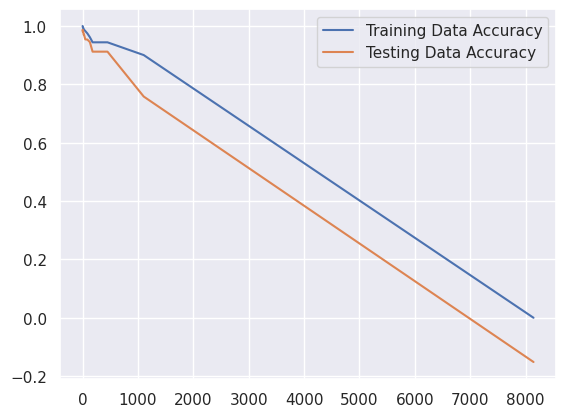

In [58]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [59]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

29

In [60]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

0.0021481884057991106

In [61]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=11)

decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0021481884057991106, random_state=11)

In [62]:
#Training
y_train_pred=decision_tree_model.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)


************************************************************
mean_squared_error: 0.012768357487922762
************************************************************
rmse: 0.11299715699044274
************************************************************
mean_absolute_error: 0.056352657004831205
************************************************************
r2_score: 0.9999987566189394


In [63]:
#Testing
y_test_pred=decision_tree_model.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


************************************************************
mean_squared_error: 97.90438911052001
************************************************************
rmse: 9.894664679033848
************************************************************
mean_absolute_error: 6.068386524822692
************************************************************
r2_score: 0.986410829113254


##**Random Forest**

In [64]:
rf_tree_reg=RandomForestRegressor(random_state=12)
rf_tree_reg.fit(x_train,y_train)


RandomForestRegressor(random_state=12)

In [65]:
#Training
y_train_pred=rf_tree_reg.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



************************************************************
mean_squared_error: 25.277170829347984
************************************************************
rmse: 5.027640682203531
************************************************************
mean_absolute_error: 2.5926471014492796
************************************************************
r2_score: 0.9975315612751379


In [66]:
#Testing
y_test_pred=rf_tree_reg.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


************************************************************
mean_squared_error: 115.45895237595745
************************************************************
rmse: 10.74518275209675
************************************************************
mean_absolute_error: 6.237661702127649
************************************************************
r2_score: 0.9844052717600983


#**DT Hyperparameter Tunning**

In [67]:
# rf_tree_reg=RandomForestRegressor(random_state=12)

# parameter_grid= {"n_estimators" : np.arange(10,200),
#                  "criterion":('squared_error', 'absolute_error'),
#                  "max_depth": np.arange(3,8),
#                  "min_samples_split": np.arange(2,20),
#                  "min_samples_leaf": np.arange(2,15),
#                  "max_features": ('sqrt', 'log2')

#                  }

# gscv_rf_reg = GridSearchCV(rf_tree_reg, parameter_grid, cv=5)
# gscv_rf_reg.fit(x_train, y_train)
# gscv_rf_reg.best_estimator_

In [68]:
# #Training
# y_train_pred=gscv_dt.predict(x_train)
# mse=mean_squared_error(y_train_pred,y_train)
# rmse=np.sqrt(mse)
# mae=mean_absolute_error(y_train_pred,y_train)

# r2=r2_score(y_train_pred,y_train)
# print("*"*60)

# print('mean_squared_error:',mse)
# print("*"*60)

# print('rmse:',rmse)
# print("*"*60)

# print('mean_absolute_error:',mae)
# print("*"*60)

# print('r2_score:',r2)


In [69]:
# #Testing
# y_test_pred=gscv_dt.predict(x_test)
# mse=mean_squared_error(y_test_pred,y_test)
# rmse=np.sqrt(mse)
# mae=mean_absolute_error(y_test_pred,y_test)

# r2=r2_score(y_test_pred,y_test)
# print("*"*60)

# print('mean_squared_error:',mse)
# print("*"*60)

# print('rmse:',rmse)
# print("*"*60)

# print('mean_absolute_error:',mae)
# print("*"*60)

# print('r2_score:',r2)


##**KNN Regression**

In [70]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [71]:
#Training
y_train_pred=knn_reg.predict(x_train)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



************************************************************
mean_squared_error: 88.53411892753623
************************************************************
rmse: 9.409257086908415
************************************************************
mean_absolute_error: 5.57891304347826
************************************************************
r2_score: 0.9913657867271729


In [72]:
#Testing
y_test_pred=knn_reg.predict(x_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

testing_accuract_list.append(r2)


************************************************************
mean_squared_error: 188.2234822978723
************************************************************
rmse: 13.719456341191961
************************************************************
mean_absolute_error: 7.229148936170211
************************************************************
r2_score: 0.9750747913349097


#**KNN Normalization**

In [73]:
normlization=MinMaxScaler()
array=normlization.fit_transform(x_train)
knn_norm=pd.DataFrame(array,columns=x_train.columns)
knn_reg_model=KNeighborsRegressor()
knn_reg_model.fit(knn_norm,y_train)

KNeighborsRegressor()

In [74]:
#Training
y_train_pred=knn_reg_model.predict(knn_norm)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



************************************************************
mean_squared_error: 94.29777428985508
************************************************************
rmse: 9.710704108861266
************************************************************
mean_absolute_error: 5.675521739130435
************************************************************
r2_score: 0.9907671962610132


In [75]:
#Testing
array=normlization.transform(x_test)
knn_norm_test=pd.DataFrame(array,columns=x_test.columns)

y_test_pred=knn_reg_model.predict(knn_norm_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)


testing_accuract_list.append(r2)


************************************************************
mean_squared_error: 222.7078652765956
************************************************************
rmse: 14.92339992349584
************************************************************
mean_absolute_error: 7.550170212765953
************************************************************
r2_score: 0.9708112258193715


#**KNN Standerdization**

In [76]:
standerdization=StandardScaler()
array=standerdization.fit_transform(x_train)
knn_std=pd.DataFrame(array,columns=x_train.columns)
knn_reg_model=KNeighborsRegressor()
knn_reg_model.fit(knn_std,y_train)

KNeighborsRegressor()

In [77]:
#Training
y_train_pred=knn_reg_model.predict(knn_std)
mse=mean_squared_error(y_train_pred,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train_pred,y_train)

r2=r2_score(y_train_pred,y_train)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)

training_accuracy_list.append(r2)



************************************************************
mean_squared_error: 92.44691159420289
************************************************************
rmse: 9.614931699923972
************************************************************
mean_absolute_error: 5.575768115942027
************************************************************
r2_score: 0.9909632070389862


In [78]:
#Testing
array=standerdization.transform(x_test)
knn_std_test=pd.DataFrame(array,columns=x_test.columns)

y_test_pred=knn_reg_model.predict(knn_std_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test_pred,y_test)

r2=r2_score(y_test_pred,y_test)
print("*"*60)

print('mean_squared_error:',mse)
print("*"*60)

print('rmse:',rmse)
print("*"*60)

print('mean_absolute_error:',mae)
print("*"*60)

print('r2_score:',r2)
testing_accuract_list.append(r2)


************************************************************
mean_squared_error: 186.4926456170212
************************************************************
rmse: 13.656231018001314
************************************************************
mean_absolute_error: 7.1931914893617
************************************************************
r2_score: 0.975290711273005


In [79]:
model_details = ['LinearRegression','Ridge','Lasso','Ridgr_hyper','Lasso_hyper','DecisionTree','DecisionTree_Hyper_pre','DecisionTree_Hyper_post',
                 'RandomForest','KNN',"KNN_Normalization",'KNN_standerdization']
len(model_details)

12

In [80]:
(training_accuracy_list)
training_accuracy_list

[0.8132687628951601,
 0.8132604840559561,
 0.8132565743234766,
 0.7992554371198364,
 0.7899603087195557,
 1.0,
 0.9958810891093084,
 0.9999987566189394,
 0.9975315612751379,
 0.9913657867271729,
 0.9907671962610132,
 0.9909632070389862]

In [81]:
(testing_accuract_list)


[0.7804175656322877,
 0.7804407061652039,
 0.7804522526596318,
 0.7826633017007592,
 0.783433572746701,
 0.9863684171307262,
 0.9857771253606844,
 0.986410829113254,
 0.9844052717600983,
 0.9750747913349097,
 0.9708112258193715,
 0.975290711273005]

In [82]:

training_accuracy=pd.DataFrame(training_accuracy_list,columns=['training_accuracy_list'])
testing_accuracy=pd.DataFrame(testing_accuract_list,columns=['testing_accuract_list'])
model_details=pd.DataFrame(model_details,columns=['model_details'])

final_accuracy=pd.concat([model_details,training_accuracy,testing_accuracy],axis=1)
final_accuracy

,model_details,training_accuracy_list,testing_accuract_list
0,LinearRegression,0.813269,0.780418
1,Ridge,0.813260,0.780441
2,Lasso,0.813257,0.780452
3,Ridgr_hyper,0.799255,0.782663
4,Lasso_hyper,0.789960,0.783434
5,DecisionTree,1.000000,0.986368
6,DecisionTree_Hyper_pre,0.995881,0.985777
7,DecisionTree_Hyper_post,0.999999,0.986411
8,RandomForest,0.997532,0.984405
9,KNN,0.991366,0.975075


In [83]:
training_accuracy

,training_accuracy_list
0,0.813269
1,0.813260
2,0.813257
3,0.799255
4,0.789960
5,1.000000
6,0.995881
7,0.999999
8,0.997532
9,0.991366


In [84]:
testing_accuracy

,testing_accuract_list
0,0.780418
1,0.780441
2,0.780452
3,0.782663
4,0.783434
5,0.986368
6,0.985777
7,0.986411
8,0.984405
9,0.975075


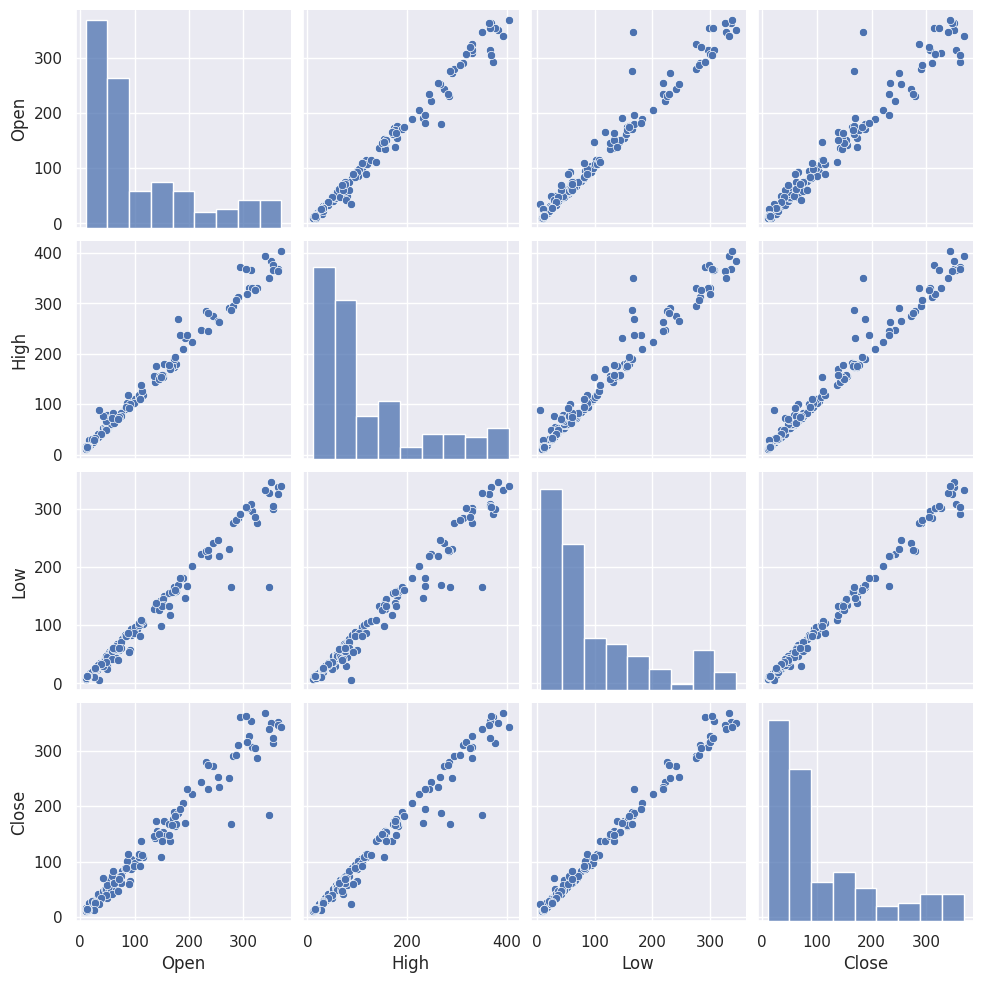

In [85]:
sns.pairplot(df)